In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm, tqdm_pandas
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('bmh')

In [2]:
train = pd.read_csv("../dataset/train_augmented.csv")

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Classification

### Jaccard distance

Based on the distribution seen on previous plot, we can see that most duplicate questions have Jaccard distance higher than 0.2. If we use this as threshold, how good is our prediction model?

In [57]:
# to split into training, validation, and test set
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train['jaccard_dist'], train['is_duplicate'], test_size=0.2, random_state=1, stratify=train['is_duplicate'])

In [58]:
# prediction based on jaccard distance on training set

_pred = []
for i in range(0, len(X_train)):
    if X_train.iloc[i] > 0.2:
        _pred.append(1)
    else:
        _pred.append(0)

y_pred_train = np.array(_pred)

_train_true = 0

for i in range(0, len(X_train)):
    if (y_pred_train[i] == y_train.iloc[i]):
        _train_true += 1

In [60]:
# prediction based on jaccard distance on test set

_pred = []
for i in range(0, len(X_test)):
    if X_test.iloc[i] > 0.2:
        _pred.append(1)
    else:
        _pred.append(0)

y_pred_test = np.array(_pred)

_test_true = 0

for i in range(0, len(X_test)):
    if (y_pred_test[i] == y_test.iloc[i]):
        _test_true += 1

In [63]:
print('Accuracy of Jaccard distance-based classifier on training set: {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print('F1-score of Jaccard distance-based classifier on training set: {:.2f}%'.format(f1_score(y_train, y_pred_train) * 100))

Accuracy of Jaccard distance-based classifier on training set: 62.48%
F1-score of Jaccard distance-based classifier on training set: 63.37%


In [64]:
print('Accuracy of Jaccard distance-based classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print('F1-score of Jaccard distance-based classifier on test set: {:.2f}%'.format(f1_score(y_test, y_pred_test) * 100))

Accuracy of Jaccard distance-based classifier on test set: 62.34%
F1-score of Jaccard distance-based classifier on test set: 63.29%


Using this simple "model", it seems to have decent results.

### Logistic regressions

After observing the correlation plot, we'll user 4 features as the dependent variables: 
- edit_dist_last_word
- jaccard_dist
- cosine_dist
- num_common_words

Then, we'll split the dataset into training, validation, and test set.

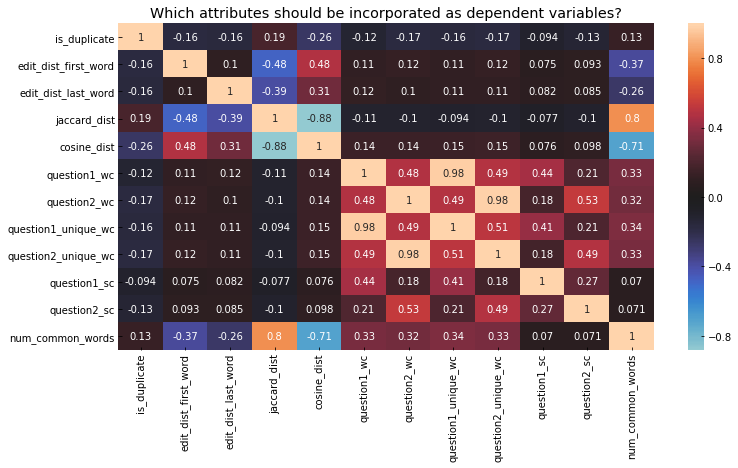

In [13]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(train[['is_duplicate','edit_dist_first_word','edit_dist_last_word',
                   'jaccard_dist','cosine_dist','question1_wc','question2_wc','question1_unique_wc','question2_unique_wc','question1_sc','question2_sc','num_common_words']].corr(),
            center=0,
            annot = True,
           ax=ax)

plt.title("Which attributes should be incorporated as dependent variables?")
plt.show()

In [15]:
# to split into training, validation, and test set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[['edit_dist_last_word','jaccard_dist','cosine_dist','num_common_words']], train['is_duplicate'], test_size=0.2, random_state=1, stratify=train['is_duplicate'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

print("Training, validation and testing split was successful.")

Training, validation and testing split was successful.


In [16]:
from sklearn.linear_model import LogisticRegression

classifier_logres = LogisticRegression(random_state=0)
classifier_logres.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred_train = classifier_logres.predict(X_train)

from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[107672  55544]
 [ 64312  78981]]


In [18]:
y_pred_val = classifier_logres.predict(X_val)

from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix)

[[26779 14025]
 [16185 19639]]


In [19]:
y_pred_test = classifier_logres.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[33466 17539]
 [20139 24641]]


In [20]:
print('Accuracy of logistic regression classifier on training set: {:.2f}%'.format(accuracy_score(y_train, y_pred_train) * 100))
print('F1-score of logistic regression classifier on training set: {:.2f}%'.format(f1_score(y_train, y_pred_train) * 100))

Accuracy of logistic regression classifier on training set: 60.90%
F1-score of logistic regression classifier on training set: 56.86%


In [21]:
print('Accuracy of logistic regression classifier on validation set: {:.2f}%'.format(accuracy_score(y_val, y_pred_val) * 100))
print('F1-score of logistic regression classifier on validation set: {:.2f}%'.format(f1_score(y_val, y_pred_val) * 100))

Accuracy of logistic regression classifier on validation set: 60.58%
F1-score of logistic regression classifier on validation set: 56.52%


In [22]:
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_test) * 100))
print('F1-score of logistic regression classifier on test set: {:.2f}%'.format(f1_score(y_test, y_pred_test) * 100))

Accuracy of logistic regression classifier on test set: 60.66%
F1-score of logistic regression classifier on test set: 56.67%


## Deep learning

Prepare word embeddings.

In [23]:
from os.path import expanduser, exists

KERAS_DATASETS_DIR = expanduser('~/.keras/datasets/')
GLOVE_ZIP_FILE_URL = 'http://nlp.stanford.edu/data/glove.840B.300d.zip'
GLOVE_ZIP_FILE = 'glove.840B.300d.zip'
GLOVE_FILE = 'glove.840B.300d.txt'
Q1_TRAINING_DATA_FILE = 'data/augmented/q1_train.npy'
Q2_TRAINING_DATA_FILE = 'data/augmented/q2_train.npy'
LABEL_TRAINING_DATA_FILE = 'data/augmented/label_train.npy'
WORD_EMBEDDING_MATRIX_FILE = 'data/augmented/word_embedding_matrix.npy'
NB_WORDS_DATA_FILE = 'data/augmented/nb_words.json'
MAX_NB_WORDS = 200000
MAX_SEQUENCE_LENGTH = 25
EMBEDDING_DIM = 300

In [24]:
import json

q1_data = np.load(Q1_TRAINING_DATA_FILE)
q2_data = np.load(Q2_TRAINING_DATA_FILE)
labels = np.load(LABEL_TRAINING_DATA_FILE)
word_embedding_matrix = np.load(WORD_EMBEDDING_MATRIX_FILE)

with open(NB_WORDS_DATA_FILE) as json_data:
    nb_words = json.load(json_data)
    

In [25]:
qid_dict = {}

for i,series in train_augmented.iterrows():
    if series['qid1'] not in qid_dict:
        qid_dict[series['qid1']] = series['question1']
    if series['qid2'] not in qid_dict:
        qid_dict[series['qid2']] = series['question2']

In [26]:
import re

def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text

In [27]:
qid_dict = {}

for i,series in train_augmented.iterrows():
    if series['qid1'] not in qid_dict:
        qid_dict[series['qid1']] = series['question1']
    if series['qid2'] not in qid_dict:
        qid_dict[series['qid2']] = series['question2']

In [28]:
txt_raw = []

for key, value in qid_dict.items():
    txt_raw.append(str(value))

In [29]:
txt = []
for i in range(0, len(txt_raw)):
    txt.append(text_to_word_list(txt_raw[i]))

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import get_file

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(txt)
question1_word_sequences = tokenizer.texts_to_sequences(train_augmented['question1'])
question2_word_sequences = tokenizer.texts_to_sequences(train_augmented['question2'])
word_index = tokenizer.word_index

print("Words in index: %d" % len(word_index))

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Words in index: 85518


In [31]:
if not exists(KERAS_DATASETS_DIR + GLOVE_ZIP_FILE):
    zipfile = ZipFile(get_file(GLOVE_ZIP_FILE, GLOVE_ZIP_FILE_URL))
    zipfile.extract(GLOVE_FILE, path=KERAS_DATASETS_DIR)
    
print("Processing", GLOVE_FILE)

embeddings_index = {}
with open(KERAS_DATASETS_DIR + GLOVE_FILE, encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

print('Word embeddings: %d' % len(embeddings_index))

Processing glove.840B.300d.txt
Word embeddings: 2196016


In [32]:
nb_words = min(MAX_NB_WORDS, len(word_index))
word_embedding_matrix = np.zeros((nb_words + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        word_embedding_matrix[i] = embedding_vector

print('Null word embeddings: %d' % np.sum(np.sum(word_embedding_matrix, axis=1) == 0))

Null word embeddings: 18731


## MaLSTM Model

In [33]:
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, LSTM, Merge, Add, Concatenate, Dense
import keras.backend as K
from keras.optimizers import Adadelta, Adam
from keras.callbacks import ModelCheckpoint

from time import time
import datetime

In [82]:
def f1_score(y_true, y_pred):
    """
    f1 score

    :param y_true:
    :param y_pred:
    :return:
    """
    tp_3d = K.concatenate(
        [
            K.cast(y_true, 'bool'),
            K.cast(K.round(y_pred), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    fp_3d = K.concatenate(
        [
            K.cast(K.abs(y_true - K.ones_like(y_true)), 'bool'),
            K.cast(K.round(y_pred), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    fn_3d = K.concatenate(
        [
            K.cast(y_true, 'bool'),
            K.cast(K.abs(K.round(y_pred) - K.ones_like(y_pred)), 'bool'),
            K.cast(K.ones_like(y_pred), 'bool')
        ], axis=1
    )

    tp = K.sum(K.cast(K.all(tp_3d, axis=1), 'int32'))
    fp = K.sum(K.cast(K.all(fp_3d, axis=1), 'int32'))
    fn = K.sum(K.cast(K.all(fn_3d, axis=1), 'int32'))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * ((precision * recall) / (precision + recall))

In [73]:
# to split into training, validation, and test set for text sequences
from sklearn.cross_validation import train_test_split

X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(q1_data, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(q2_data, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_q1, X_val_q1, y_train_q1, y_val_q1 = train_test_split(X_train_q1, y_train_q1, test_size=0.2, random_state=1, stratify=y_train_q1)
X_train_q2, X_val_q2, y_train_q2, y_val_q2 = train_test_split(X_train_q2, y_train_q2, test_size=0.2, random_state=1, stratify=y_train_q2)

print("Training, validation and testing split was successful.")

Training, validation and testing split was successful.


In [74]:
X_train = {'left': X_train_q1, 'right': X_train_q2}
X_validation = {'left': X_val_q1, 'right': X_val_q2}
X_test = {'left': X_test_q1, 'right': X_test_q2}

y_train = y_train_q1
y_validation = y_val_q1

In [75]:
assert X_train['left'].shape == X_train['right'].shape
assert len(X_train['left']) == len(y_train)

In [38]:
checkpointer = ModelCheckpoint(filepath='weights.best.model.hdf5', 
                               verbose=1, save_best_only=True)

### Model training

#### Only based on word embedding

1. Adadelta optimizer - loss = MSE

In [45]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 25

def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_output, right_output])

# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:42: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [47]:
# Start training
training_start_time = time()

malstm_trained1 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation),
                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 200s 651us/step - loss: 0.1991 - acc: 0.7061 - f1_score: nan - val_loss: 0.1760 - val_acc: 0.7457 - val_f1_score: 0.7174
Epoch 2/25
306509/306509 [==============================] - 200s 654us/step - loss: 0.1688 - acc: 0.7605 - f1_score: nan - val_loss: 0.1661 - val_acc: 0.7656 - val_f1_score: 0.7474
Epoch 3/25
306509/306509 [==============================] - 204s 664us/step - loss: 0.1605 - acc: 0.7758 - f1_score: 0.7561 - val_loss: 0.1619 - val_acc: 0.7702 - val_f1_score: 0.7397
Epoch 4/25
306509/306509 [==============================] - 205s 670us/step - loss: 0.1553 - acc: 0.7850 - f1_score: 0.7664 - val_loss: 0.1577 - val_acc: 0.7784 - val_f1_score: 0.7527
Epoch 5/25
306509/306509 [==============================] - 206s 672us/step - loss: 0.1515 - acc: 0.7920 - f1_score: 0.7742 - val_loss: 0.1559 - val_acc: 0.7795 - val_f1_score: 0.7496
Epoch 6/25
306509/306509 [=========

Epoch 23/25
306509/306509 [==============================] - 206s 673us/step - loss: 0.1280 - acc: 0.8322 - f1_score: 0.8180 - val_loss: 0.1407 - val_acc: 0.8065 - val_f1_score: 0.7900
Epoch 24/25
306509/306509 [==============================] - 206s 673us/step - loss: 0.1273 - acc: 0.8332 - f1_score: 0.8191 - val_loss: 0.1407 - val_acc: 0.8071 - val_f1_score: 0.7904
Epoch 25/25
306509/306509 [==============================] - 209s 683us/step - loss: 0.1267 - acc: 0.8343 - f1_score: 0.8202 - val_loss: 0.1404 - val_acc: 0.8074 - val_f1_score: 0.7929
Training time finished.
25 epochs in 1:26:18.917131


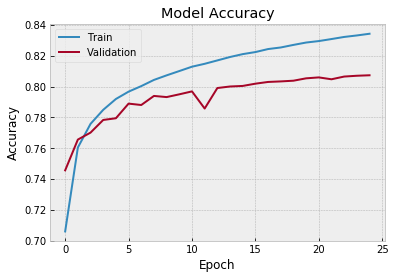

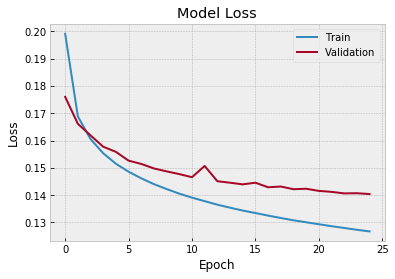

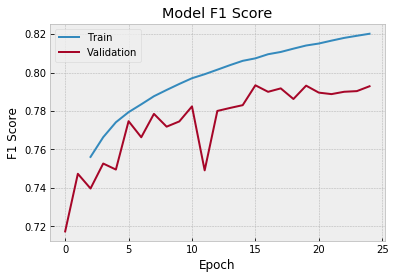

In [49]:
# Plot accuracy
plt.plot(malstm_trained1.history['acc'])
plt.plot(malstm_trained1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained1.history['loss'])
plt.plot(malstm_trained1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained1.history['f1_score'])
plt.plot(malstm_trained1.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [50]:
loss, accuracy, f1score = malstm_trained1.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1414, accuracy = 0.8060, f1-score = 0.7890


*2. Adam optimizer - loss function: MSE*

In [51]:
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

optimizer = Adam()

malstm.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

# Start training
training_start_time = time()

malstm_trained2 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 211s 688us/step - loss: 0.1353 - acc: 0.8199 - f1_score: 0.8031 - val_loss: 0.1445 - val_acc: 0.8009 - val_f1_score: 0.7803
Epoch 2/25
306509/306509 [==============================] - 206s 672us/step - loss: 0.1333 - acc: 0.8231 - f1_score: 0.8066 - val_loss: 0.1434 - val_acc: 0.8021 - val_f1_score: 0.7856
Epoch 3/25
306509/306509 [==============================] - 207s 676us/step - loss: 0.1309 - acc: 0.8273 - f1_score: 0.8112 - val_loss: 0.1430 - val_acc: 0.8057 - val_f1_score: 0.7943
Epoch 4/25
306509/306509 [==============================] - 206s 672us/step - loss: 0.1284 - acc: 0.8317 - f1_score: 0.8159 - val_loss: 0.1412 - val_acc: 0.8057 - val_f1_score: 0.7843
Epoch 5/25
306509/306509 [==============================] - 206s 672us/step - loss: 0.1263 - acc: 0.8350 - f1_score: 0.8199 - val_loss: 0.1405 - val_acc: 0.8061 - val_f1_score: 0.7864
Epoch 6/25
306509/306509 [===

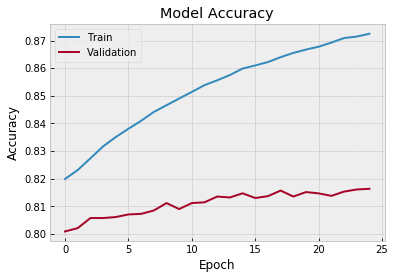

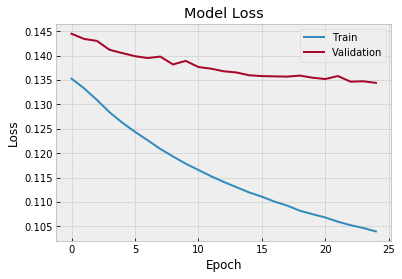

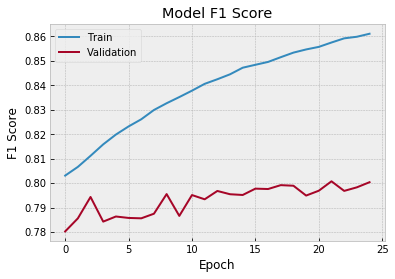

In [52]:
# Plot accuracy
plt.plot(malstm_trained2.history['acc'])
plt.plot(malstm_trained2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained2.history['loss'])
plt.plot(malstm_trained2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained2.history['f1_score'])
plt.plot(malstm_trained2.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [53]:
loss, accuracy, f1score = malstm_trained2.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1357, accuracy = 0.8133, f1-score = 0.7936


*3. Adam as optimizer, loss function: binary cross entropy*

In [54]:
# Pack it all up into a model
malstm = Model([left_input, right_input], [malstm_distance])

optimizer = Adam()

malstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

# Start training
training_start_time = time()

malstm_trained3 = malstm.fit([X_train['left'], X_train['right']], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right']], y_validation))

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 205s 669us/step - loss: 0.3958 - acc: 0.8707 - f1_score: 0.8582 - val_loss: 0.4841 - val_acc: 0.8154 - val_f1_score: 0.7958
Epoch 2/25
306509/306509 [==============================] - 201s 655us/step - loss: 0.3927 - acc: 0.8706 - f1_score: 0.8581 - val_loss: 0.4844 - val_acc: 0.8128 - val_f1_score: 0.7940
Epoch 3/25
306509/306509 [==============================] - 203s 662us/step - loss: 0.3911 - acc: 0.8698 - f1_score: 0.8570 - val_loss: 0.4841 - val_acc: 0.8144 - val_f1_score: 0.7961
Epoch 4/25
306509/306509 [==============================] - 204s 666us/step - loss: 0.3891 - acc: 0.8703 - f1_score: 0.8576 - val_loss: 0.4850 - val_acc: 0.8116 - val_f1_score: 0.7874
Epoch 5/25
306509/306509 [==============================] - 197s 641us/step - loss: 0.3873 - acc: 0.8700 - f1_score: 0.8573 - val_loss: 0.4847 - val_acc: 0.8119 - val_f1_score: 0.7877
Epoch 6/25
306509/306509 [===

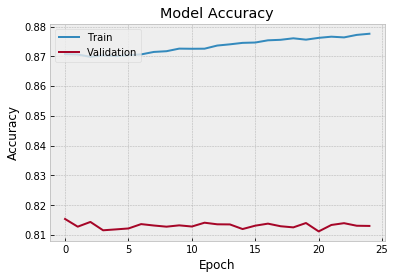

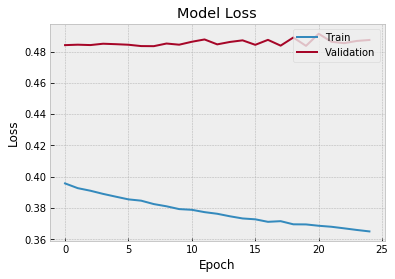

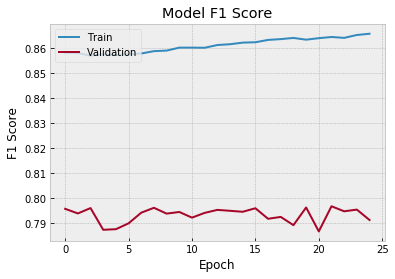

In [55]:
# Plot accuracy
plt.plot(malstm_trained3.history['acc'])
plt.plot(malstm_trained3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_trained3.history['loss'])
plt.plot(malstm_trained3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_trained3.history['f1_score'])
plt.plot(malstm_trained3.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
loss, accuracy, f1score = malstm_trained3.model.evaluate([X_test_q1, X_test_q2], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.4881, accuracy = 0.8119, f1-score = 0.7870


#### Custom model architecture #1

In [69]:
# columns which are added as input to deep learning model
# feats = ['edit_dist_last_word','jaccard_dist','cosine_dist','num_common_words']

feats = ['cosine_dist', 'jaccard_dist', 'edit_dist_first_word',
         'edit_dist_last_word', 'num_common_words', 'num_common_words_ner', 'pct_common_words',
         'pct_common_words_ner', 'diff_wc', 'diff_unique_wc']

feats_value = np.array(train_augmented[feats])

In [76]:
# to split into training, validation, and test set for features
from sklearn.cross_validation import train_test_split

X_train_feats, X_test_feats, y_train_feats, y_test_feats = train_test_split(feats_value, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_feats, X_val_feats, y_train_feats, y_val_feats = train_test_split(X_train_feats, y_train_feats, test_size=0.2, random_state=1, stratify=y_train_feats)

print("Training, validation and testing split was successful.")

assert X_train_feats.shape[0] == X_train['left'].shape[0]

Training, validation and testing split was successful.


In [86]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 25


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_input = Input(shape=(X_train_feats.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_input])
right_combined = Concatenate()([right_output, feats_input]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# Pack it all up into a model
malstm_custom = Model([left_input, right_input, feats_input], [malstm_distance])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:42: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [87]:
malstm_custom.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 25, 300)      25655700    input_14[0][0]                   
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 25, 300)      25655700    input_15[0][0]                   
__________________________________________________________________________________________________
lstm_6 (LS

In [88]:
# Start training
training_start_time = time()

malstm_custom_trained1 = malstm_custom.fit([X_train['left'], X_train['right'], X_train_feats], y_train, batch_size=batch_size, epochs=n_epoch,
                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats], y_validation),
                                          callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 203s 662us/step - loss: 0.1999 - acc: 0.7050 - f1_score: nan - val_loss: 0.1768 - val_acc: 0.7439 - val_f1_score: 0.7109
Epoch 2/25
306509/306509 [==============================] - 203s 661us/step - loss: 0.1693 - acc: 0.7602 - f1_score: 0.7380 - val_loss: 0.1677 - val_acc: 0.7651 - val_f1_score: 0.7555
Epoch 3/25
306509/306509 [==============================] - 205s 667us/step - loss: 0.1610 - acc: 0.7743 - f1_score: 0.7547 - val_loss: 0.1613 - val_acc: 0.7734 - val_f1_score: 0.7559
Epoch 4/25
306509/306509 [==============================] - 205s 668us/step - loss: 0.1560 - acc: 0.7829 - f1_score: 0.7642 - val_loss: 0.1578 - val_acc: 0.7790 - val_f1_score: 0.7606
Epoch 5/25
306509/306509 [==============================] - 207s 674us/step - loss: 0.1523 - acc: 0.7900 - f1_score: 0.7720 - val_loss: 0.1560 - val_acc: 0.7831 - val_f1_score: 0.7693
Epoch 6/25
306509/306509 [======

Training time finished.
25 epochs in 1:25:41.684493


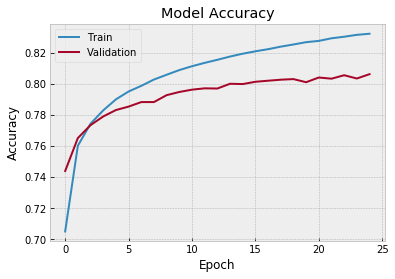

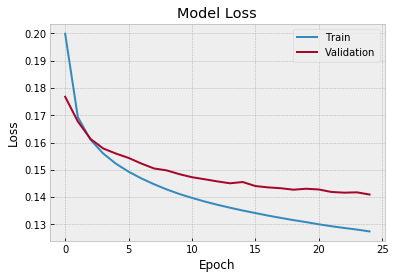

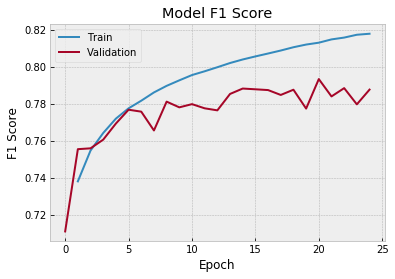

In [89]:
# Plot accuracy
plt.plot(malstm_custom_trained1.history['acc'])
plt.plot(malstm_custom_trained1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained1.history['loss'])
plt.plot(malstm_custom_trained1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained1.history['f1_score'])
plt.plot(malstm_custom_trained1.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [90]:
loss, accuracy, f1score = malstm_custom_trained1.model.evaluate([X_test_q1, X_test_q2, X_test_feats], y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1420, accuracy = 0.8038, f1-score = 0.7825


#### Custom model architecture #2



In [129]:
# columns which are added as input to deep learning model

# feats_ind_q1 = ['question1_wc', 'question1_unique_wc', 'question1_sc','q1_pos_tag']
# feats_ind_q2 = ['question2_wc', 'question2_unique_wc', 'question2_sc','q2_pos_tag']
feats_ind_q1 = ['question1_wc', 'question1_unique_wc', 'question1_sc']
feats_ind_q2 = ['question2_wc', 'question2_unique_wc', 'question2_sc']
feats_shared = ['cosine_dist', 'jaccard_dist', 'edit_dist_first_word', 'edit_dist_last_word',
               'num_common_words', 'num_common_words_ner', 'pct_common_words', 'pct_common_words_ner']

feats_ind_q1 = np.array(train[feats_ind_q1])
feats_ind_q2 = np.array(train[feats_ind_q2])

feats_shared_list = {}
for col in feats_shared:
    feats_shared_list[col] = np.array(train[col])

In [130]:
# to split into training, validation, and test set for additional features
from sklearn.cross_validation import train_test_split

X_train_feats, X_test_feats, y_train_feats, y_test_feats = train_test_split(feats_value, labels, test_size=0.2, random_state=1, stratify=labels)

X_train_feats, X_val_feats, y_train_feats, y_val_feats = train_test_split(X_train_feats, y_train_feats, test_size=0.2, random_state=1, stratify=y_train_feats)

print("Training, validation and testing split was successful.")

assert X_train_feats.shape[0] == X_train['left'].shape[0]

Training, validation and testing split was successful.


In [131]:
# to split into training, validation, and test set for additional individual features
from sklearn.cross_validation import train_test_split

X_train_feats_ind_q1, X_test_feats_ind_q1, y_train_feats_ind_q1, y_test_feats_ind_q1 = train_test_split(feats_ind_q1, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_ind_q1, X_val_feats_ind_q1, y_train_feats_ind_q1, y_val_feats_ind_q1 = train_test_split(X_train_feats_ind_q1, y_train_feats_ind_q1, test_size=0.2, random_state=1, stratify=y_train_feats_ind_q1)
assert X_train_feats_ind_q1.shape[0] == X_train['left'].shape[0]

print("ind_q1 - Training, validation and testing split was successful.")
print("---------------------------------------------------------------")

X_train_feats_ind_q2, X_test_feats_ind_q2, y_train_feats_ind_q2, y_test_feats_ind_q2 = train_test_split(feats_ind_q2, labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_ind_q2, X_val_feats_ind_q2, y_train_feats_ind_q2, y_val_feats_ind_q2 = train_test_split(X_train_feats_ind_q2, y_train_feats_ind_q2, test_size=0.2, random_state=1, stratify=y_train_feats_ind_q2)
assert X_train_feats_ind_q2.shape[0] == X_train['left'].shape[0]

print("ind_q2 - Training, validation and testing split was successful.")
print("---------------------------------------------------------------")

ind_q1 - Training, validation and testing split was successful.
---------------------------------------------------------------
ind_q2 - Training, validation and testing split was successful.
---------------------------------------------------------------


In [132]:
# to split into training, validation, and test set for additional shared features
from sklearn.cross_validation import train_test_split

print("List of shared features: ")
for key in feats_shared_list.keys():
    print(key)

print("\n---------------------------------------------------------------\n")

X_train_feats_shared_edit_dist_last_word, X_test_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, y_test_feats_shared_edit_dist_last_word = train_test_split(feats_shared_list['edit_dist_last_word'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_edit_dist_last_word, X_val_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_edit_dist_last_word, y_train_feats_shared_edit_dist_last_word, test_size=0.2, random_state=1, stratify=y_train_feats_shared_edit_dist_last_word)
assert X_train_feats_shared_edit_dist_last_word.shape[0] == X_train['left'].shape[0]

print("edit_dist_last_word - Training, validation and testing split was successful.")

X_train_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, y_test_feats_shared_edit_dist_first_word = train_test_split(feats_shared_list['edit_dist_first_word'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_edit_dist_first_word, y_train_feats_shared_edit_dist_first_word, test_size=0.2, random_state=1, stratify=y_train_feats_shared_edit_dist_first_word)
assert X_train_feats_shared_edit_dist_first_word.shape[0] == X_train['left'].shape[0]

print("edit_dist_first_word - Training, validation and testing split was successful.")

X_train_feats_shared_num_common_words_ner, X_test_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, y_test_feats_shared_num_common_words_ner = train_test_split(feats_shared_list['num_common_words_ner'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_num_common_words_ner, X_val_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_num_common_words_ner, y_train_feats_shared_num_common_words_ner, test_size=0.2, random_state=1, stratify=y_train_feats_shared_num_common_words_ner)
assert X_train_feats_shared_num_common_words_ner.shape[0] == X_train['left'].shape[0]

print("num_common_words_ner - Training, validation and testing split was successful.")

X_train_feats_shared_num_common_words, X_test_feats_shared_num_common_words, y_train_feats_shared_num_common_words, y_test_feats_shared_num_common_words = train_test_split(feats_shared_list['num_common_words'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_num_common_words, X_val_feats_shared_num_common_words, y_train_feats_shared_num_common_words, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_num_common_words, y_train_feats_shared_num_common_words, test_size=0.2, random_state=1, stratify=y_train_feats_shared_num_common_words)
assert X_train_feats_shared_num_common_words.shape[0] == X_train['left'].shape[0]

print("num_common_words - Training, validation and testing split was successful.")

X_train_feats_shared_cosine_dist, X_test_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, y_test_feats_shared_cosine_dist = train_test_split(feats_shared_list['cosine_dist'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_cosine_dist, X_val_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_cosine_dist, y_train_feats_shared_cosine_dist, test_size=0.2, random_state=1, stratify=y_train_feats_shared_cosine_dist)
assert X_train_feats_shared_cosine_dist.shape[0] == X_train['left'].shape[0]

print("cosine_dist - Training, validation and testing split was successful.")

X_train_feats_shared_jaccard_dist, X_test_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, y_test_feats_shared_jaccard_dist = train_test_split(feats_shared_list['jaccard_dist'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_jaccard_dist, X_val_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_jaccard_dist, y_train_feats_shared_jaccard_dist, test_size=0.2, random_state=1, stratify=y_train_feats_shared_jaccard_dist)
assert X_train_feats_shared_jaccard_dist.shape[0] == X_train['left'].shape[0]

print("jaccard_dist - Training, validation and testing split was successful.")

X_train_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, y_test_feats_shared_pct_common_words = train_test_split(feats_shared_list['pct_common_words'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_pct_common_words, y_train_feats_shared_pct_common_words, test_size=0.2, random_state=1, stratify=y_train_feats_shared_pct_common_words)
assert X_train_feats_shared_pct_common_words.shape[0] == X_train['left'].shape[0]

print("pct_common_words - Training, validation and testing split was successful.")

X_train_feats_shared_pct_common_words_ner, X_test_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, y_test_feats_shared_pct_common_words_ner = train_test_split(feats_shared_list['pct_common_words_ner'], labels, test_size=0.2, random_state=1, stratify=labels)
X_train_feats_shared_pct_common_words_ner, X_val_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, y_val_feats_shared_edit_dist_list_word = train_test_split(X_train_feats_shared_pct_common_words_ner, y_train_feats_shared_pct_common_words_ner, test_size=0.2, random_state=1, stratify=y_train_feats_shared_pct_common_words_ner)
assert X_train_feats_shared_pct_common_words_ner.shape[0] == X_train['left'].shape[0]

print("pct_common_words_ner - Training, validation and testing split was successful.")

List of shared features: 
num_common_words
edit_dist_last_word
pct_common_words_ner
edit_dist_first_word
cosine_dist
num_common_words_ner
jaccard_dist
pct_common_words

---------------------------------------------------------------

edit_dist_last_word - Training, validation and testing split was successful.
edit_dist_first_word - Training, validation and testing split was successful.
num_common_words_ner - Training, validation and testing split was successful.
num_common_words - Training, validation and testing split was successful.
cosine_dist - Training, validation and testing split was successful.
jaccard_dist - Training, validation and testing split was successful.
pct_common_words - Training, validation and testing split was successful.
pct_common_words_ner - Training, validation and testing split was successful.


*1. Adadelta optimizer - sigmoid on dense layer - loss function: binary cross entropy*

In [133]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 25


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

# Embedded version of the inputs

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_left = Input(shape=(X_train_feats_ind_q1.shape[1],), dtype='float32')
feats_right = Input(shape=(X_train_feats_ind_q2.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_left])
right_combined = Concatenate()([right_output, feats_right]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# combine malstm_distance output to shared features
feats_shared_edit_dist_first_word = Input(shape=(1,), dtype='float32')
feats_shared_edit_dist_last_word = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_cosine_dist = Input(shape=(1,), dtype='float32')
feats_shared_jaccard_dist = Input(shape=(1,), dtype='float32')

cc1 = Concatenate()([malstm_distance, feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                    feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                    feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                    feats_shared_cosine_dist, feats_shared_jaccard_dist]) # Merge data must same row column

out_ = Dense(1, activation='sigmoid')(cc1)


# Pack it all up into a model
malstm_custom2 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

/home/engineering/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:46: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [134]:
malstm_custom2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_42 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 25, 300)      25655700    input_41[0][0]                   
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 25, 300)      25655700    input_42[0][0]                   
__________________________________________________________________________________________________
lstm_9 (LS

In [135]:
# Start training
training_start_time = time()

malstm_custom_trained2 = malstm_custom2.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 217s 708us/step - loss: 0.9354 - acc: 0.6391 - f1_score: nan - val_loss: 0.6040 - val_acc: 0.6741 - val_f1_score: 0.6007
Epoch 2/25
306509/306509 [==============================] - 203s 662us/step - loss: 0.5947 - acc: 0.6821 - f1_score: 0.6368 - val_loss: 0.5906 - val_acc: 0.6798 - val_f1_score: 0.6362
Epoch 3/25
306509/306509 [==============================] - 205s 668us/step - loss: 0.5852 - acc: 0.6861 - f1_score: 0.6423 - val_loss: 0.5822 - val_acc: 0.6892 - val_f1_score: 0.6590
Epoch 4/25
306509/306509 [==============================] - 206s 673us/step - loss: 0.5759 - acc: 0.6923 - f1_score: 0.6510 - val_loss: 0.5762 - val_acc: 0.6968 - val_f1_score: 0.6778
Epoch 5/25
306509/306509 [==============================] - 208s 680us/step - loss: 0.5677 - acc: 0.6997 - f1_score: 0.6596 - val_loss: 0.5645 - val_acc: 0.7009 - val_f1_score: 0.6604
Epoch 6/25
306509/306509 [======

Training time finished.
25 epochs in 1:26:58.851531


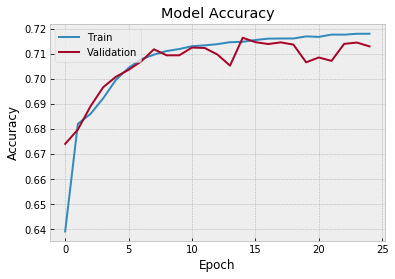

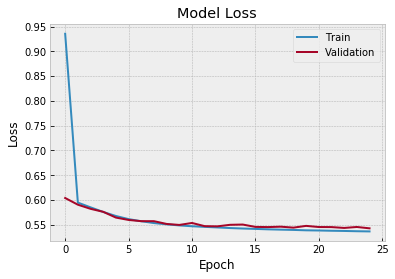

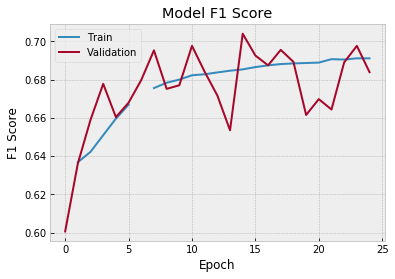

In [136]:
# Plot accuracy
plt.plot(malstm_custom_trained2.history['acc'])
plt.plot(malstm_custom_trained2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained2.history['loss'])
plt.plot(malstm_custom_trained2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained2.history['f1_score'])
plt.plot(malstm_custom_trained2.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [137]:
loss, accuracy, f1score = malstm_custom_trained2.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.5432, accuracy = 0.7130, f1-score = 0.6812


*2. Adam optimizer - sigmoid on dense layer - loss function: binary cross entropy*

In [138]:
# Pack it all up into a model
malstm_custom3 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

optimizer = Adam()

malstm_custom3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

In [139]:
# Start training
training_start_time = time()

malstm_custom_trained3 = malstm_custom3.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 210s 686us/step - loss: 0.5419 - acc: 0.7138 - f1_score: 0.6859 - val_loss: 0.5479 - val_acc: 0.7056 - val_f1_score: 0.6583
Epoch 2/25
306509/306509 [==============================] - 203s 664us/step - loss: 0.5399 - acc: 0.7153 - f1_score: 0.6878 - val_loss: 0.5464 - val_acc: 0.7067 - val_f1_score: 0.6630
Epoch 3/25
306509/306509 [==============================] - 205s 668us/step - loss: 0.5382 - acc: 0.7161 - f1_score: 0.6893 - val_loss: 0.5453 - val_acc: 0.7135 - val_f1_score: 0.6964
Epoch 4/25
306509/306509 [==============================] - 206s 671us/step - loss: 0.5360 - acc: 0.7176 - f1_score: 0.6908 - val_loss: 0.5436 - val_acc: 0.7087 - val_f1_score: 0.6714
Epoch 5/25
306509/306509 [==============================] - 207s 674us/step - loss: 0.5343 - acc: 0.7191 - f1_score: 0.6925 - val_loss: 0.5432 - val_acc: 0.7096 - val_f1_score: 0.6714
Epoch 6/25
306509/306509 [===

Training time finished.
25 epochs in 1:27:52.087094


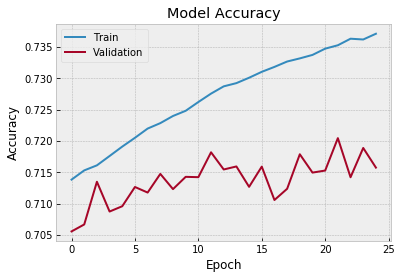

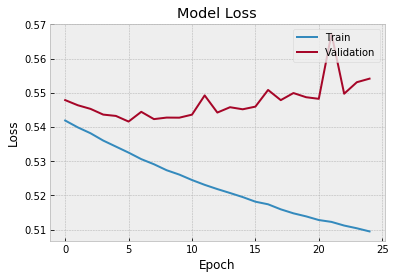

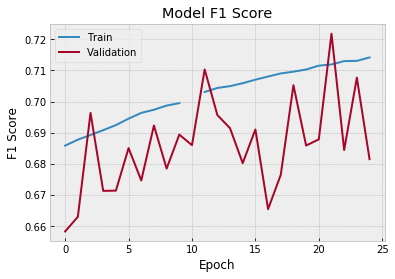

In [140]:
# Plot accuracy
plt.plot(malstm_custom_trained3.history['acc'])
plt.plot(malstm_custom_trained3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained3.history['loss'])
plt.plot(malstm_custom_trained3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained3.history['f1_score'])
plt.plot(malstm_custom_trained3.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [141]:
loss, accuracy, f1score = malstm_custom_trained3.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.5573, accuracy = 0.7136, f1-score = 0.6760


*3. Adam optimizer - sigmoid on dense layer -  loss function: mse*

In [142]:
# Pack it all up into a model
malstm_custom4 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

optimizer = Adam()

malstm_custom4.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy', f1_score])

In [143]:
# Start training
training_start_time = time()

malstm_custom_trained4 = malstm_custom4.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

Train on 306509 samples, validate on 76628 samples
Epoch 1/25
306509/306509 [==============================] - 212s 692us/step - loss: 0.1695 - acc: 0.7392 - f1_score: 0.7175 - val_loss: 0.1830 - val_acc: 0.7188 - val_f1_score: 0.6873
Epoch 2/25
306509/306509 [==============================] - 207s 677us/step - loss: 0.1685 - acc: 0.7419 - f1_score: 0.7204 - val_loss: 0.1838 - val_acc: 0.7176 - val_f1_score: 0.6799
Epoch 3/25
306509/306509 [==============================] - 208s 679us/step - loss: 0.1679 - acc: 0.7433 - f1_score: 0.7217 - val_loss: 0.1848 - val_acc: 0.7226 - val_f1_score: 0.7123
Epoch 4/25
306509/306509 [==============================] - 208s 680us/step - loss: 0.1672 - acc: 0.7448 - f1_score: 0.7235 - val_loss: 0.1836 - val_acc: 0.7223 - val_f1_score: 0.7054
Epoch 5/25
306509/306509 [==============================] - 208s 679us/step - loss: 0.1665 - acc: 0.7460 - f1_score: 0.7244 - val_loss: 0.1841 - val_acc: 0.7228 - val_f1_score: 0.6978
Epoch 6/25
306509/306509 [===

Training time finished.
25 epochs in 1:27:10.784977


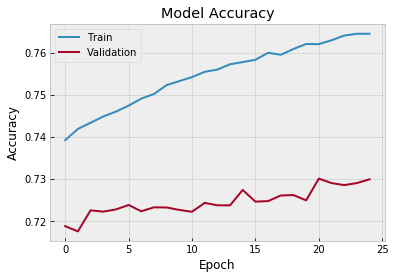

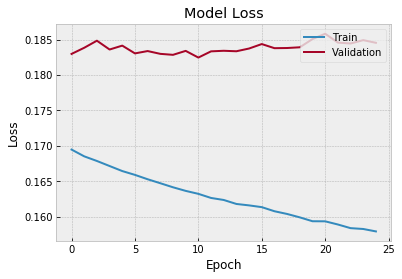

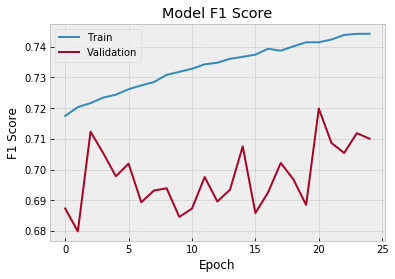

In [144]:
# Plot accuracy
plt.plot(malstm_custom_trained4.history['acc'])
plt.plot(malstm_custom_trained4.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained4.history['loss'])
plt.plot(malstm_custom_trained4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained4.history['f1_score'])
plt.plot(malstm_custom_trained4.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [145]:
loss, accuracy, f1score = malstm_custom_trained4.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

loss = 0.1855, accuracy = 0.7279, f1-score = 0.7047


*4. Adam optimizer - relu on dense layer - mse as loss function*

This model is **not re-trained using augmented dataset**, since it has low accuracy and high loss.

In [ ]:
# build the model
# Model variables
n_hidden = 50
gradient_clipping_norm = 1.25
batch_size = 64
n_epoch = 25
max_seq_length = 31


def exponent_neg_manhattan_distance(left, right):
    ''' Helper function for the similarity estimate of the LSTMs outputs'''
    return K.exp(-K.sum(K.abs(left-right), axis=1, keepdims=True))

# The visible layer
left_input = Input(shape=(max_seq_length,), dtype='int32')
right_input = Input(shape=(max_seq_length,), dtype='int32')

# Embedded version of the inputs

encoded_left = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(left_input)

encoded_right = Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=max_seq_length, 
                 trainable=False)(right_input)

# Since this is a siamese network, both sides share the same LSTM
shared_lstm = LSTM(n_hidden)

left_output = shared_lstm(encoded_left)
right_output = shared_lstm(encoded_right)

feats_left = Input(shape=(X_train_feats_ind_q1.shape[1],), dtype='float32')
feats_right = Input(shape=(X_train_feats_ind_q2.shape[1],), dtype='float32')

left_combined = Concatenate()([left_output, feats_left])
right_combined = Concatenate()([right_output, feats_right]) 

# Calculates the distance as defined by the MaLSTM model
malstm_distance = Merge(mode=lambda x: exponent_neg_manhattan_distance(x[0], x[1]), output_shape=lambda x: (x[0][0], 1))([left_combined, right_combined])

# combine malstm_distance output to shared features
feats_shared_edit_dist_first_word = Input(shape=(1,), dtype='float32')
feats_shared_edit_dist_last_word = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words = Input(shape=(1,), dtype='float32')
feats_shared_num_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words = Input(shape=(1,), dtype='float32')
feats_shared_pct_common_words_ner = Input(shape=(1,), dtype='float32')
feats_shared_cosine_dist = Input(shape=(1,), dtype='float32')
feats_shared_jaccard_dist = Input(shape=(1,), dtype='float32')

cc1 = Concatenate()([malstm_distance, feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                    feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                    feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                    feats_shared_cosine_dist, feats_shared_jaccard_dist]) # Merge data must same row column

out_ = Dense(1, activation='relu')(cc1)


# Pack it all up into a model
malstm_custom5 = Model([left_input, right_input, feats_left, feats_right,
                       feats_shared_edit_dist_first_word, feats_shared_edit_dist_last_word,
                        feats_shared_num_common_words, feats_shared_num_common_words_ner, 
                        feats_shared_pct_common_words, feats_shared_pct_common_words_ner,
                        feats_shared_cosine_dist, feats_shared_jaccard_dist], [out_])

# Adadelta optimizer, with gradient clipping by norm
optimizer = Adadelta(clipnorm=gradient_clipping_norm)

malstm_custom5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])

In [ ]:
# Start training
training_start_time = time()

malstm_custom_trained5 = malstm_custom5.fit([X_train['left'], X_train['right'], X_train_feats_ind_q1, X_train_feats_ind_q2,
                                            X_train_feats_shared_edit_dist_first_word, X_train_feats_shared_edit_dist_last_word,
                                            X_train_feats_shared_num_common_words, X_train_feats_shared_num_common_words_ner,
                                            X_train_feats_shared_pct_common_words, X_train_feats_shared_pct_common_words_ner,
                                            X_train_feats_shared_cosine_dist, X_train_feats_shared_jaccard_dist], 
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=n_epoch,
                                            validation_data=([X_validation['left'], X_validation['right'], X_val_feats_ind_q1, X_val_feats_ind_q2,
                                                             X_val_feats_shared_edit_dist_first_word, X_val_feats_shared_edit_dist_last_word,
                                                             X_val_feats_shared_num_common_words, X_val_feats_shared_num_common_words_ner,
                                                             X_val_feats_shared_pct_common_words, X_val_feats_shared_pct_common_words_ner,
                                                             X_val_feats_shared_cosine_dist, X_val_feats_shared_jaccard_dist], 
                                                             y_validation),
                                            callbacks=[checkpointer])

print("Training time finished.\n{} epochs in {}".format(n_epoch, datetime.timedelta(seconds=time()-training_start_time)))

In [ ]:
# Plot accuracy
plt.plot(malstm_custom_trained5.history['acc'])
plt.plot(malstm_custom_trained5.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(malstm_custom_trained5.history['loss'])
plt.plot(malstm_custom_trained5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot f1 score
plt.plot(malstm_custom_trained5.history['f1_score'])
plt.plot(malstm_custom_trained5.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, f1score = malstm_custom_trained5.model.evaluate([X_test['left'], X_test['right'], X_test_feats_ind_q1, X_test_feats_ind_q2,
                                                                  X_test_feats_shared_edit_dist_first_word, X_test_feats_shared_edit_dist_last_word,
                                                                  X_test_feats_shared_num_common_words, X_test_feats_shared_num_common_words_ner,
                                                                  X_test_feats_shared_pct_common_words, X_test_feats_shared_pct_common_words_ner,
                                                                  X_test_feats_shared_cosine_dist, X_test_feats_shared_jaccard_dist],
                                                                 y_test, verbose=0)
print('loss = {0:.4f}, accuracy = {1:.4f}, f1-score = {2:.4f}'.format(loss, accuracy, f1score))

# Current results:

## word embedding only
### raw text
1. adadelta optimizer result - mse as loss function
    - loss = 0.1240, accuracy = 0.8247, f1-score = 0.7487

2. adam optimizer result - mse as loss function
    - loss = 0.1254, accuracy = 0.8245, f1-score = 0.7492

3. adam optimizer result - binary cross entropy as loss function
    - loss = 0.4725, accuracy = 0.8211, f1-score = 0.7488
    - bad fitting (check plot)

### preprocessed text: lowercase, remove punctuation
1. adadelta optimizer result - mse as loss function
    - loss = 0.1414, accuracy = 0.8060, f1-score = 0.7890 **after augmentation**
    
2. adam optimizer result - mse as loss function
    - loss = 0.1357, accuracy = 0.8133, f1-score = 0.7936 **after augmentation**
    - seems good, performance could be improved if trained on more epoch

3. adam optimizer result - binary cross entropy as loss function
    - loss = 0.4881, accuracy = 0.8119, f1-score = 0.7870 **after augmentation**
    - bad fitting, overfit? (check plot)

## Custom 1: concat feats to each embedding output
### raw text
1. adadelta optimizer - mse as loss function
    - loss = 0.1252, accuracy = 0.8245, f1-score = 0.7508

### preprocessed text: lowercase, remove punctuation
1. adadelta optimizer - mse as loss function
    - loss = 0.1420, accuracy = 0.8038, f1-score = 0.7825 **after augmentation**


## Custom 2: concat individual features to each question; concat shared features to shared lstm output
### raw text
1. adadelta optimizer - binary cross entropy as loss function - sigmoid on dense layer
    - loss = 0.5343, accuracy = 0.7161, f1-score = nan
     
2. adam optimizer - binary cross entropy as loss function - sigmoid on dense layer
    - loss = 0.5510, accuracy = 0.7241, f1-score = nan
    
3. adam optimizer - mse as loss function - sigmoid on dense layer
    - loss = 0.1803, accuracy = 0.7327, f1-score = nan
    
4. adam optimizer - mse as loss function - relu on dense layer
    - loss = 0.6883, accuracy = 0.6663, f1-score = nan
    
### preprocessed text: lowercase, remove punctuation
1. adadelta optimizer - binary cross entropy as loss function - sigmoid on dense layer 
    - loss = 0.5432, accuracy = 0.7130, f1-score = 0.6812 **after augmentation**
    
2. adam optimizer - binary cross entropy as loss function - sigmoid on dense layer
    - loss = 0.5573, accuracy = 0.7136, f1-score = 0.6760 **after augmentation**

3. adam optimizer - mse as loss function - sigmoid on dense layer
    - loss = 0.1855, accuracy = 0.7279, f1-score = 0.7047 **after augmentation**